<a href="https://colab.research.google.com/github/Jasongiks/Kenyan_Fertility_Rate_Analysis/blob/main/Kenyan_Fertility_Rate_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='#6a5acd'>Statistical Analysis with Python - Guiding Notebook</font>

## <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

What are the factors that determine the number of children born to a woman of reproductive age in Kenya?

### b) Defining the Metric for Success

This project will be a success when we are able to carry out data analysis to gain insights that answer the research question.

### c) Understanding the context 

The Demographic and Health Surveys (DHS) Program has collected, analyzed, and disseminated accurate and representative data on population, health, HIV, and nutrition through more than 400 surveys in over 90 countries.

As a Data professional you are tasked to determine the main factors that can help determine the number of total children ever born by a woman of reproductive age in Kenya. You are provided with the Kenya Demographics Health Survey (KDHS 2014) data set.

### d) Recording the Experimental Design

1. Load libraries
2. Load dataset with the following variables:
    * CASEID : Unique Case identifier
    * V010 : Respondents Year of Birth
    * V012 : Respondents current age
    * V025 : Type of residence
    * V024 : Region
    * V106 : Highest level of education
    * V152 : Age of household headV201 : Total children ever born
3. Answer the deliverables outlined below
4. Summarize findings.

**Deliverables:**
* Input the dataset provided and display the head(5) of the dataset with the above variables of interest only.
* Calculate the mean, median and mode for V012 , V152 and V201. Would you prefer mean or median for V201?
* Calculate the Range, IQR and standard deviation for V012 and V152. Comment on variability of the variables.
* Plot a histogram of V012 and V152 and explain the skewness.
* Create a frequency table for V024 and V106 then plot a barchart for the two variables.
* Create a boxplot of V201 by (V025, V106, V024) separately.
* Create a scatter plot and compute the Pearson Correlation Coefficient between V201 and V012 explaining your findings.

### e) Data Relevance

While this data set provided the information necessary to answer the research question, it could benefit from having more data, such as the income level of the respondents, their marital status, and so on.

## <font color='#2F4F4F'>2. Data Cleaning & Analysis</font>

In [ ]:
# loading libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading the main data set
# kdhs2014 = pd.read_csv('kdhs2014_childfile.csv')
kdhs2014 = pd.read_csv('https://bit.ly/khds_dataset')
kdhs2014.head(5)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (47,71,89,123,125,133,135,136,145,146,147,148,203,206,291,292,293,294,295,296,297,298,299,300,301,343,344,392,413,430,439,449,450,451,453,461,463,468,502,517,549,551,553,554,578,664,668,672,676,684,691,817,821,838,849,850,851,852,882,883,884,885,886,887,888,889,890,891,892,893,904,905,912,914,929,933,934,935,936,979,980,981,1007,1008,1009,1010,1011,1021,1022,1023) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,CASEID,MIDX,V000,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012,V013,V014,V015,V016,V017,V018,V019,V019A,V020,V021,V022,V023,V024,V025,V026,V027,V028,V029,V030,V031,V032,V034,V040,V042,...,SYPN1,SPN2,SDPN2,SMPN2,SYPN2,SPN3,SDPN3,SMPN3,SYPN3,SRV1,SDRV1,SMRV1,SYRV1,SRV2,SDRV2,SMRV2,SYRV2,SYF,SDYF,SMYF,SYYF,SAMZ,SDAMZ,SMAMZ,SYAMZ,S521BA,S521BB,S521BC,S521BD,S521BE,S521BX,S539AA,S539AB,S539AC,S539AD,S539AE,S539AF,S539AG,S539AY,S522C
0,1,0001019 02,1,KE6,1,19,2,1,5476381,8,2014,1376,8,1991,1100,23,20-24,Month and year - information complete,Completed,19,1309,13,68,2,All woman sample,1,1,1,Nairobi,Urban,NaN,1,178,7,175,177,6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0001019 03,1,KE6,1,19,3,1,5476381,8,2014,1376,2,1991,1094,23,20-24,Month and year - information complete,Completed,31,1309,13,68,2,All woman sample,1,1,1,Nairobi,Urban,NaN,3,178,7,175,177,6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0001033 02,1,KE6,1,33,2,1,5476381,8,2014,1376,8,1988,1064,26,25-29,Month and year - information complete,Completed,19,1309,13,68,2,All woman sample,1,1,1,Nairobi,Urban,NaN,1,179,7,175,177,6.0,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0001033 02,2,KE6,1,33,2,1,5476381,8,2014,1376,8,1988,1064,26,25-29,Month and year - information complete,Completed,19,1309,13,68,2,All woman sample,1,1,1,Nairobi,Urban,NaN,1,179,7,175,177,6.0,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0001037 02,1,KE6,1,37,2,1,5476381,8,2014,1376,2,1992,1106,22,20-24,Month and year - information complete,Completed,19,1309,13,68,2,All woman sample,1,1,1,Nairobi,Urban,NaN,1,178,7,175,177,6.0,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# selecting only the relevant columns
df = kdhs2014[['CASEID', 'V010', 'V012', 'V025', 'V024', 'V106', 'V152', 'V201']]
df.head()

,CASEID,V010,V012,V025,V024,V106,V152,V201
0,0001019 02,1991,23,Urban,Nairobi,Secondary,52.0,2
1,0001019 03,1991,23,Urban,Nairobi,Secondary,52.0,1
2,0001033 02,1988,26,Urban,Nairobi,Secondary,27.0,2
3,0001033 02,1988,26,Urban,Nairobi,Secondary,27.0,2
4,0001037 02,1992,22,Urban,Nairobi,Primary,29.0,3


In [ ]:
#getting the shape of our dataset
df.shape


(20964, 8)

In [ ]:
# finding and dealing with null values
df.isnull().sum()

CASEID    0
V010      0
V012      0
V025      0
V024      0
V106      0
V152      1
V201      0
dtype: int64

In [ ]:
#for the missing value in the V152 column, we can fill it with the average
#of that column without greatly affecting our dataset.

df.fillna(value = df['V152'].mean(),inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
# performing data conversion
df.dtypes

CASEID     object
V010        int64
V012        int64
V025       object
V024       object
V106       object
V152      float64
V201        int64
dtype: object

In [ ]:
# dropping duplicates, if any
df = df.drop_duplicates()

In [ ]:
# checking for the shape of the dataset
df.shape

(14949, 8)

In [ ]:
# calculating the mean, median, and mode of the V012 variable

avg_age = df['V012'].mean()
mode_age = df['V012'].mode().iloc[0]
med_age = df['V012'].median()

#printing out the outputs
print("The mean age of the respondents  is ", round(avg_age,0), " years")
print("Most respondents were ", mode_age , " years old")
print("The median age of the respondents is ", med_age, " years")

The mean age of the respondents  is  29.0  years
Most respondents were  25  years old
The median age of the respondents is  28.0  years


In [ ]:
# calculating the mean, median, and mode of the V152 variable

avg_hse = df['V152'].mean()
mode_hse = df['V152'].mode().iloc[0]
med_hse = df['V152'].median()

#printing out the outputs
print("The mean age of the household head  is ", round(avg_hse,0), " years")
print("Most household heads were ", mode_hse , " years old")
print("The median age of the household head is ", med_hse, " years")


The mean age of the household head  is  38.0  years
Most household heads were  30.0  years old
The median age of the household head is  35.0  years


In [ ]:
# calculating the mean, median, and mode of the V201 variable
avg_child = df['V201'].mean()
mode_child = df['V201'].mode().iloc[0]
med_child = df['V201'].median()

#printing out the outputs
print("The mean number of children respondents had was ", round(avg_child,1) )
print("Most respondents had ", mode_child , " children")
print("The median number of children respondents had was ", med_child, " children")

The mean number of children respondents had was  3.5
Most respondents had  1  children
The median number of children respondents had was  3.0  children


**Would you prefer mean or median for V201?** I prefer the median since it is not affected by outliers such as the mode value.

In [ ]:
# calculating the range, IQR, and standard deviation of the V012 variable

#getting the max and min respondent age
max_age = df['V012'].max()
min_age = df['V012'].min()

#Getting the range of the respondents age
range = max_age-min_age

#Getting lower and upper quantile
low_quantile = df['V012'].quantile(0.25)
up_quantile = df['V012'].quantile(0.75)

#Getting interquantile range
IQR = up_quantile - low_quantile

#Getting the standard deviation of the respondents age
std_age = df['V012'].std()

#Printing out our values
print("The range of respondents age is ", range, "years")
print("The interquantile range of the respondents age is ", IQR)
print("The standard deviation of the respondents age is ", round(std_age,3))


The range of respondents age is  34 years
The interquantile range of the respondents age is  10.0
The standard deviation of the respondents age is  6.795


In [ ]:
# calculating the range, IQR, and standard deviation of the V152 variable

#getting the max and min age of household head
max_age_head = df['V152'].max()
min_age_head = df['V152'].min()

#Getting the range of age of household head
range_head = max_age_head-min_age_head

#Getting lower and upper quantile
low_quantile_head = df['V152'].quantile(0.25)
up_quantile_head = df['V152'].quantile(0.75)

#Getting interquantile range
IQR_head = up_quantile_head - low_quantile_head

#Getting the standard deviation of the age of the household head
std_age_head = df['V152'].std()

#Printing out our values
print("The range of age of household head is ", range_head, "years")
print("The interquantile range of the age of household head is ", IQR_head)
print("The standard deviation of the age of household head is ", round(std_age_head,3))


The range of age of household head is  80.0 years
The interquantile range of the age of household head is  14.0
The standard deviation of the age of household head is  12.434


**What have you noticed about the variability of these two variables?**
1. The age range of respondents is significantly smaller than that of the household head's age.
2. The dispersion of the respondents ages to the mean is smaller compared to the dispersion of the household head's age from the mean.
3. The ages of respondets are well spread across the quantiles that of the household heads

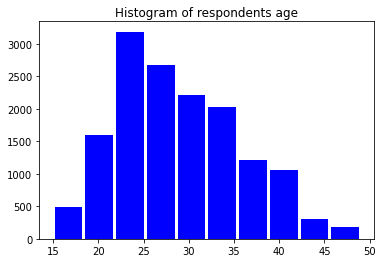

In [ ]:
# histogram of V012 variable

plt.hist(df['V012'], histtype='bar',bins = 10, rwidth = 0.9, color = 'blue')
plt.title("Histogram of respondents age", pad = 5)
plt.show()

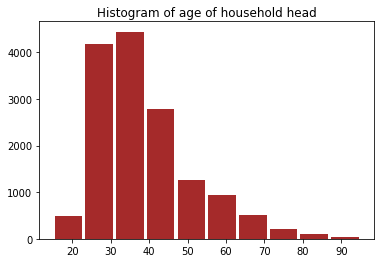

In [ ]:
# histogram of V152 variable

plt.hist(df['V152'], histtype='bar',bins = 10, rwidth = 0.9, color = 'brown')
plt.title("Histogram of age of household head", pad = 5)
plt.show()

**What have you noticed about the skewness of the two variables?** Both variables are right skewed.

In [ ]:
# displaying the frequency table of the V024 variable

df['V024'].value_counts()

Rift Valley      4760
Eastern          2299
Nyanza           2085
Coast            1857
Western          1398
Central          1197
North Eastern     925
Nairobi           428
Name: V024, dtype: int64

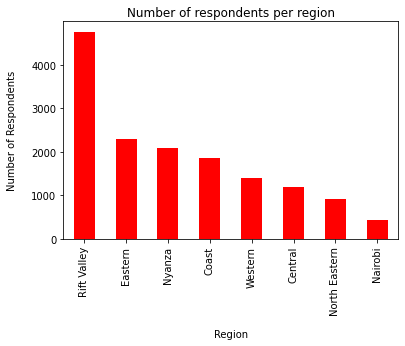

In [ ]:
# plotting the bar chart of the V024 frequency table

df['V024'].value_counts().plot(kind = 'bar', color = "red")
plt.title("Number of respondents per region", pad = 5)
plt.xlabel("Region", labelpad = 14)
plt.ylabel("Number of Respondents", labelpad = 14)
plt.show()

**Observation** Most respondents were from Rift Valley while the least number of repondents were from Nairobi.

In [ ]:
# displaying the frequency table of the V106 variable

df['V106'].value_counts()

Primary         7843
Secondary       3210
No education    2790
Higher          1106
Name: V106, dtype: int64

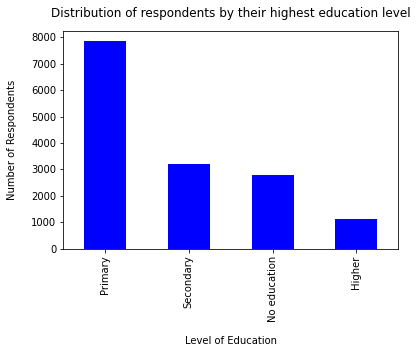

In [ ]:
# plotting the bar chart of the V106 frequency table

df['V106'].value_counts().plot(kind = 'bar', color = 'blue')
plt.title("Distribution of respondents by their highest education level", pad= 14,)
plt.xlabel("Level of Education", labelpad = 14)
plt.ylabel("Number of Respondents", labelpad = 14)
plt.show()

**Observation:** 
1. Most respondents never advanced beyond primary school level. 
2. A sizeable number never went to school. 
3. A few of the respondents have tertiary level of education

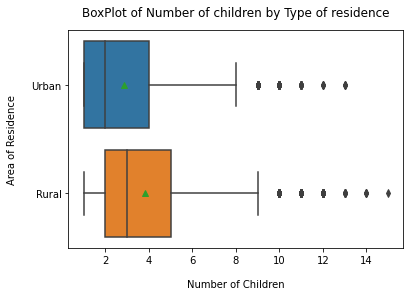

In [ ]:
# plotting a boxplot of V201 by V025

sns.boxplot(x=df['V201'], y=df['V025'], showmeans = True)
plt.title("BoxPlot of Number of children by Type of residence", pad = 14)
plt.xlabel("Number of Children", labelpad = 14)
plt.ylabel("Area of Residence", labelpad = 14)
plt.show()

**Observations:**
1. The mean number of children that respondents living in urban areas had was 2 children.
2. The mean number of children that respondents living in rural areas had was 3 children.
3. Respondents living in urban areas had a maximum of 8 children.
4. Respondents living in rural areas had a maximum of 9 children.
5. Outliers exist in both cases though the level of outliers is greater among respondents living in rural areas.

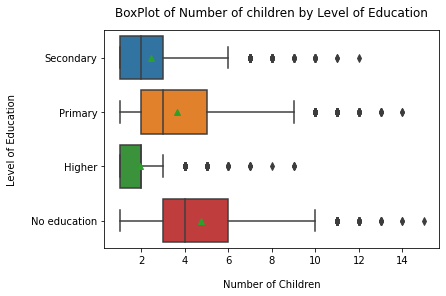

In [ ]:
# plotting a boxplot of V201 by V106

sns.boxplot(x=df['V201'], y=df['V106'], showmeans = True)
plt.title("BoxPlot of Number of children by Level of Education", pad = 14)
plt.xlabel("Number of Children", labelpad = 14)
plt.ylabel("Level of Education", labelpad = 14)
plt.show()

**Observations:**
1. The mean number of children had by respondents with secondary level education was 2 children. The minimum was 1 child while the maximum was 6 children.
2. The mean number of children had by respondents with primary level education was 3 children. The minimum number was 1 child while the maximum was 9 children.
3. The mean number of children had by respondents with no education qualification was 4 children. The minium was 1 child while the maximum was 10 children.
4. The mean number of children had by respondents with a higher education level was 1 child.The minimum was 1 child while the maximum was 3 children.
5. The value of outliers is greatest among respondents with no education qualification and least amont those with a higher education qualification.



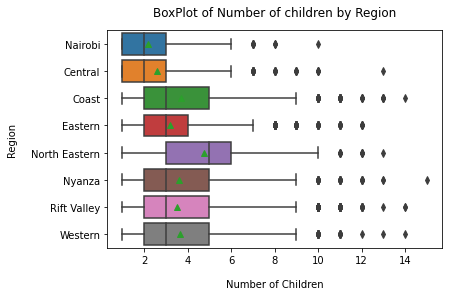

In [ ]:
# plotting a boxplot of V201 by V024

sns.boxplot(x=df['V201'], y=df['V024'], showmeans = True)
plt.title("BoxPlot of Number of children by Region", pad = 14)
plt.xlabel("Number of Children", labelpad = 14)
plt.ylabel("Region", labelpad = 14)
plt.show()

**Observations:**
1. The mean number of children had by respondents in Nairobi and central region was 2 children. The number was 3 children in coast, eastern, Nyanza, Rift Valley and western region. The number was highest among respondents in north eastern region with a mean of 5 children.
2. The minimum number of children had by respondents in all regions was 1 child.
3. The maximum number of chilren among resondents in Nairobi and central regions was 6 children. The number was 5 among respondents from eastern region while respondents from Coast, Nyanza, Rift Valley and Western regions had a maximum count of 9 children. Repondent from North Eastern had a maimum of 10 children.
4. Outliers existed in all regions.


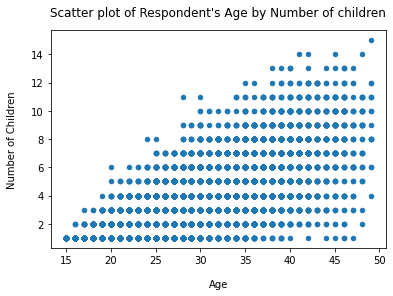

In [ ]:
# scatter plot of V201 by V012

df.plot.scatter(x='V012',y = 'V201')
plt.title("Scatter plot of Respondent's Age by Number of children", pad = 14)
plt.xlabel("Age", labelpad = 14)
plt.ylabel("Number of Children", labelpad = 14)
plt.show()

**Observation:**
The number of children increases with an increase in age.

In [ ]:
# previewing the correlation between the V201 and the V012 variables
df["V201"].corr(df["V012"], method="pearson") 


0.7104720955348267

**What have you noticed about the relationship between the V201 and V012 variables based on the scatter plot and the Pearson Correlation Coefficient?** 
There is atrong correlation between the number of children the respondent's have with their age.

## <font color='#2F4F4F'>3. Summary of Findings</font>

-** What do the histograms tell you about the ages of the respondents and od the Household Heads?**
Most of the respondents are between the ages of 18 and 35 years while most household heads are between the ages of 23 and 47 years.
- **Which region has the most number of respondents? Which region has the least?** Rift Valley had the most number of respondents while Nairobi had the least.
- **Which level of education has been attained by majority of the respondents? Which has been attained by the minority?** Majority of the respondents have a primary level education qualification while the minority of the respondents have a higher education qualification.
- **Which type of residency are more children born in: rural or urban?** The rural region has more children born.
- **Which education level are more children born to?** More children are born by respondents with no education qualification.
- **Which region leads in terms of total children born? Which region is the last?** North Eastern region has the most children born while Nairobi and Central regions have the least number of children born.
- **Are more children born to younger women or older women?** More children are born by older women.